In [1]:
import os
import json
import sys
sys.path.append("../data/saved_models/")
sys.path.append("../model_scripts/")
sys.path.append("../utils/")

import numpy as np
import fig4_analysis as rnn
import model_utils

import matplotlib.pyplot as plt
import fig4_plots

In [7]:
# file paths
data_folder = f"../data/saved_models/many_maps/"
save_folder = f"../figures/many_maps_plots/"

if os.path.isdir(save_folder):
    print('save folder exists')
else:
    os.mkdir(save_folder)

save folder exists


In [ ]:
# font sizes
title_size = 10
axis_label = 9
tick_label = 7

# colors
pos_col = 'xkcd:cobalt blue'
c1 = 'xkcd:scarlet'

In [10]:
'''
Generalization to multiple maps 

We find that the 3 maps occupy a 2D remapping subspace in which the remapping dims
form a 2D equilateral triangle. Remapping dims between each pair are separated by 60 deg.

For any M maps, this generalizes to a regular (M-1)-dim simplex.
The angle between remapping dims should be: phi = arccos(1/(M-1)) for any M maps.
As M becomes large, this angle approaches 90.
'''

model_IDs = os.listdir(data_folder)

In [ ]:
''' example trial for M = 6 maps '''

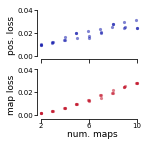

In [9]:
''' look at the avg final loss for different num maps '''
# data params
n_models = len(model_IDs)
n_maps = np.asarray([])
pos_losses = np.asarray([])
map_losses = np.asarray([])
for m_id in model_IDs:
    # get the final losses
    pos_loss = np.load(f"{data_folder}/{m_id}/pos_losses.npy")
    pos_losses = np.append(pos_losses, pos_loss[-1])
    map_loss = np.load(f"{data_folder}/{m_id}/map_losses.npy")
    map_losses = np.append(map_losses, map_loss[-1])
    
    # get the number of maps
    n_maps = np.append(n_maps, m_id.split('_')[-1])
n_maps = n_maps.astype(int)

# figure params
f, ax = plt.subplots(2, 1, figsize=(2, 2))
DOT_SIZE = 10

# for jittering points
JIT = np.random.randn(n_models) * 0.03

# pos loss across different num maps
ax[0].scatter(n_maps+JIT, 
               pos_losses,
               c=pos_col,
               s=DOT_SIZE, lw=0,
               alpha=0.5
              )

# map loss across different num maps
ax[1].scatter(n_maps+JIT, 
               map_losses,
               c=c1,
               s=DOT_SIZE, lw=0,
               alpha=0.5
              )

for i in range(2):
    # ticks and lims
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_bounds(0, 0.04)
    ax[i].spines['bottom'].set_bounds(np.min(n_maps), np.max(n_maps))
    ax[i].set_xlim([np.min(n_maps)-0.3, np.max(n_maps)+1])
    ax[i].set_xticks([np.min(n_maps), 
                      (np.max(n_maps) + np.min(n_maps))//2, 
                      np.max(n_maps)])
    ax[i].set_ylim([-0.003, 0.04])
    ax[i].set_yticks([0, 0.02, 0.04])
    ax[i].tick_params(which='major', labelsize=tick_label, pad=0.5)
    
# labels
ax[0].set_ylabel('pos. loss', fontsize=axis_label, labelpad=1)
ax[1].set_ylabel('map loss', fontsize=axis_label, labelpad=1)
ax[0].tick_params(labelbottom=False)
ax[1].set_xlabel('num. maps', fontsize=axis_label, labelpad=1)

plt.show()
f.savefig(f'{save_folder}m_maps_loss.png', dpi=600, bbox_inches='tight')

In [ ]:
''' theoretical vs. actual angle between remapping dimensions '''
# fig params
f, ax = plt.subplots(1, 1, figsize=(2, 1))
DOT_SIZE = 1
LW = 0.5

# data params
M = np.arange(2, 101)
ax.plot(M, np.rad2deg(np.arccos(1/(M-1))), 'ko-', 
         ms=DOT_SIZE, lw=LW)

# ticks and lims
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_bounds(0, 90)
ax.spines['bottom'].set_bounds(M[0], M[-1])
ax.set_xlim([0, 101])
ax.set_xticks([M[0], M[-1]//2, M[-1]])
ax.set_ylim([-1, 91])
ax.set_yticks(np.arange(0, 100, 30))

# labels
ax.set_ylabel('cos$^{-1}$(1/M-1)', fontsize=axis_label, labelpad=1)
ax.set_xlabel('num. maps', fontsize=axis_label, labelpad=1)
ax.tick_params(which='major', labelsize=tick_label, pad=0.5)

plt.show()
f.savefig(f'{save_folder}m_maps_angles.png', dpi=600, bbox_inches='tight')

In [ ]:
''' pairwise misalignment scores - box + whiskers for each M maps '''

In [ ]:
''' example alignment in 3D PC space '''